In [1]:
import os
import glob

In [2]:
import numpy as np
from matplotlib.pyplot import *

In [3]:
import TimeTagger as TT
from TimeTagger import Flim, TimeTagStream, createTimeTaggerVirtual, EventGenerator, Countrate,ConstantFractionDiscriminator, DelayedChannel

In [4]:
glob.glob(r'C:\Users\lociuser\Documents\UserData\Jenu\BB_data\*')

['C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\Cycle00001_Filelist.txt',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\CYCLE_000001_RAWDATA_000034',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\LifetimeData_Cycle00001_000001.raw',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\LifetimeData_Cycle00001_000001.sdt',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\Thumbs.db',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\TSeries-ms499_NADH_FLIM_780_230620-001.env',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\TSeries-ms499_NADH_FLIM_780_230620-001.xml',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\TSeries-ms499_NADH_FLIM_780_230620-001_Cycle00001_Ch1_000001.ome.tif',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\TSeries-ms499_NADH_FLIM_780_230620-001_Cycle00001_Ch1_000002.ome.tif',
 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\TSeries-ms499_NADH_FLIM_780_230620-0

In [5]:
filename = 'C:\\Users\\lociuser\\Documents\\UserData\\Jenu\\BB_data\\CYCLE_000001_RAWDATA_000034'

## no ttbin header exists 
fr = TT.FileReader(filename)
print(fr.getConfiguration())

In [6]:
format_string = '{:>8} | {:>17} | {:>7} | {:>14} | {:>13}'
#print(format_string.format('TAG #', 'EVENT TYPE', 'CHANNEL', 'TIMESTAMP (ps)', 'MISSED EVENTS'))
#print('---------+-------------------+---------+----------------+--------------')

In [7]:
with open(filename,'rb') as fid:
    data = fid.read()

In [8]:
datax = np.frombuffer(data[:2**7],dtype=np.int8)

In [9]:
for i in range(len(datax)//16):
    print(" : ".join("{:02x}".format(c) for c in datax[(i*16):(i+1)*16]))

00 : 00 : 00 : 00 : -4 : -1 : -1 : -1 : 0c : 6b : -33 : 24 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : -b : 03 : 00 : 00 : -1d : 6d : -33 : 24 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : 04 : 00 : 00 : 00 : -47 : 70 : -33 : 24 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : 03 : 00 : 00 : 00 : -2e : -7b : -33 : 24 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : -5 : -1 : -1 : -1 : 04 : 0e : 12 : 34 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : 03 : 00 : 00 : 00 : 10 : 11 : 12 : 34 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : -a : 03 : 00 : 00 : 59 : 12 : 12 : 34 : -2c : -a : 3b : 00
00 : 00 : 00 : 00 : 05 : 00 : 00 : 00 : -53 : 16 : 12 : 34 : -2c : -a : 3b : 00


In [10]:
datax = np.frombuffer(data[:2**7],dtype=np.int16)
datax

array([     0,      0,     -4,     -1,  27404,   9421,  -2348,     59,
            0,      0,   1013,      0,  28131,   9421,  -2348,     59,
            0,      0,      4,      0,  28857,   9421,  -2348,     59,
            0,      0,      3,      0, -31278,   9421,  -2348,     59,
            0,      0,     -5,     -1,   3588,  13330,  -2348,     59,
            0,      0,      3,      0,   4368,  13330,  -2348,     59,
            0,      0,   1014,      0,   4697,  13330,  -2348,     59,
            0,      0,      5,      0,   5805,  13330,  -2348,     59],
      dtype=int16)

In [11]:
channels = np.frombuffer(data,dtype=np.int16)[2::8]

In [12]:
len(channels)

55111328

In [13]:
set(channels)

{-5, -4, 1, 2, 3, 4, 5, 1013, 1014}

In [14]:
for k in [1, 2, 3, 4,-4, 5,-5, 1013, 1014]:
    k_occurances = len(np.where(channels==k)[0])
    print(f'{k:4} {k_occurances:8} {k_occurances*100/len(channels):5.2f}%')

   1        1  0.00%
   2  8388716 15.22%
   3 11668186 21.17%
   4  6628098 12.03%
  -4  6628224 12.03%
   5  5065332  9.19%
  -5  5065259  9.19%
1013  6627869 12.03%
1014  5039643  9.14%


In [18]:
print(11668186- (6627869 +5039643) ,  11668186- (6628224 + 5065332) ,   (6628224 + 5065332) - (6627869 +5039643)) 

674 -25370 26044


In [15]:
(8388716)-(512*512*32)

108

In [21]:
(6627869 +5039643)/(39.0*1E3),'kHz'

(299.16697435897436, 'kHz')

In [22]:
tagformat = np.dtype([
    # TimeTag = 0, Error = 1, OverflowBegin = 2, OverflowEnd = 3, MissedEvents = 4
    ('type', 'u1'),
    # ('reserved',      'i1'),
    ('missed_events', '<u2'),
    ('channel', '<i4'),
    ('time', '<i8'),], align=True)

In [23]:
data_ = np.frombuffer(data, dtype=tagformat)

In [24]:
data_[0], data_[-1]

((0, 0, -4, 16878414636870412), (0, 0, 1013, 16917616876477258))

In [25]:
(data_[-1]['time'] - data_[0]['time'])/1e12, 'secs'

(39.202239606846, 'secs')

In [26]:
start_time = data_[0]['time']

In [27]:
%time
for k in data_[:1000]:
    if k['channel']==2:
        break

CPU times: total: 0 ns
Wall time: 0 ns


In [28]:
len(data_)/1E6

55.111328

In [29]:
%%time
times = [k['time']-start_time for k in data_[:1000000] if (k['channel']==2)]

CPU times: total: 750 ms
Wall time: 917 ms


In [30]:
invalid_index = np.where(data_['type']!=0)
print('NON TAGGED' ,len(invalid_index[0]))

NON TAGGED 0


In [31]:
missed_events = np.where(data_['missed_events']!=0)
print('MISSED' ,len(missed_events[0]))

MISSED 0


In [43]:
%%time
pixel_index = np.where(data_['channel']==2)[0]

CPU times: total: 250 ms
Wall time: 265 ms


In [44]:
%%time
pixels=[]
for pixel_number in range(len(pixel_index)):
    #print(pixel_number,end='-')
    pixels.append(data_[pixel_index[pixel_number]:pixel_index[pixel_number+1]])    
    if pixel_number == 512*512:
        break

CPU times: total: 219 ms
Wall time: 306 ms


In [45]:
%%time
ch1=[]
sync=[]
ch2=[]
for pixel in pixels:
    ch1_times  = [k['time']-start_time for k in pixel if (k['channel']==1013)]
    ch2_times  = [k['time']-start_time for k in pixel if (k['channel']==1014)]
    sync_times = [k['time']-start_time for k in pixel if (k['channel']==3)]
    ch1.append(ch1_times)
    ch2.append(ch2_times)    
    sync.append(sync_times)

CPU times: total: 5.91 s
Wall time: 6.09 s


In [55]:
%%time
frm=1
for pixel_number in range(len(pixel_index)):
    #print(pixel_number,end='-')  
    if (pixel_number % (512*512) == 0):
        tx1 = data_[pixel_index[pixel_number+1]]['time'] - data_[pixel_index[pixel_number]]['time']
        tx_1 = data_[pixel_index[pixel_number]]['time'] - data_[pixel_index[pixel_number-1]]['time']
        tx_5 = data_[pixel_index[pixel_number+6]]['time'] - data_[pixel_index[pixel_number+5]]['time']
        print(frm,pixel_number,data_[pixel_index[pixel_number]],tx_1,tx1,tx_5)
        frm+=1

1 0 (0, 0, 2, 16878830242398395) -38786631626705 3999977 4000051
2 262144 (0, 0, 2, 16880144762170547) 523404386 4000000 4000007
3 524288 (0, 0, 2, 16881459281943978) 523404429 3999992 4000041
4 786432 (0, 0, 2, 16882773801715836) 523404418 3999976 4000022
5 1048576 (0, 0, 2, 16884088321487896) 523404456 3999972 4000019
6 1310720 (0, 0, 2, 16885402841259556) 523404421 4000005 4000024
7 1572864 (0, 0, 2, 16886717361031488) 523404449 3999993 4000032
8 1835008 (0, 0, 2, 16888031880803889) 523404419 4000018 4000026
9 2097152 (0, 0, 2, 16889346400577505) 523404401 3999961 4000034
10 2359296 (0, 0, 2, 16890660920354789) 523404440 3999969 4000039
11 2621440 (0, 0, 2, 16891975440129443) 523404439 4000005 4000035
12 2883584 (0, 0, 2, 16893289959903686) 523404423 3999973 4000022
13 3145728 (0, 0, 2, 16894604479675025) 523404429 3999972 4000031
14 3407872 (0, 0, 2, 16895918999450746) 523404428 4000010 4000036
15 3670016 (0, 0, 2, 16897233519228011) 523404451 3999979 4000035
16 3932160 (0, 0, 2, 1

In [56]:
%%time
sync_index = np.where(data_['channel']==3)[0]
ch1_index = np.where(data_['channel']==1013)[0]
ch2_index = np.where(data_['channel']==1014)[0]

CPU times: total: 688 ms
Wall time: 703 ms


In [49]:
data_[0]

(0, 0, -4, 16878414636870412)

In [57]:
len(sync_index),len(ch1_index), len(ch2_index)

(11668186, 6627869, 5039643)

In [59]:
len(data_)/1E6

55.111328

2


In [67]:
%%time

px=[]

for ix,photon_event in enumerate(data_):

    if photon_event['channel']==3:
        prev_event=None
        prev_step=1
        while not (prev_event):
            prev_ = data_[ix-prev_step]
            if (prev_['channel']==1013)|(prev_['channel']==1014):
                prev_event=prev_               
            prev_step+=1
        px.append((photon_event,prev_))

    if ix==512*512*10:
        print(ix,f'{ix/len(data_):.2f}',photon_event)
        break




2621440 0.05 (0, 0, 3, 16880808144277743)
CPU times: total: 4.8 s
Wall time: 4.86 s


In [69]:
%%time

px1=[]
px2=[]

for ix,photon_event in enumerate(data_):

    if photon_event['channel']==3:
        prev_event=None
        prev_step=1
        while not (prev_event):
            prev_ = data_[ix-prev_step]
            if (prev_['channel']==1013):
                prev_event=prev_    
                px1.append((photon_event,prev_))   
            if (prev_['channel']==1014):        
                prev_event=prev_    
                px2.append((photon_event,prev_))
            prev_step+=1
        

    if ix==512*512*10:
        print(ix,f'{ix/len(data_):.2f}',photon_event)
        break




2621440 0.05 (0, 0, 3, 16880808144277743)
CPU times: total: 4.94 s
Wall time: 5.01 s


In [92]:
%%time
h1=[]
for ts in px1:
    h1.append(ts[1]['time']- ts[0]['time'])
    
h2=[]
for ts in px2:
    h2.append(ts[1]['time']- ts[0]['time'])
    

CPU times: total: 719 ms
Wall time: 859 ms


In [93]:
h1= np.array(h1)
h2=np.array(h2)

In [94]:
for h in [h1,h2]:
    print(len(h), len(h[h<-12.5E3]))

324044 3534
232006 2890


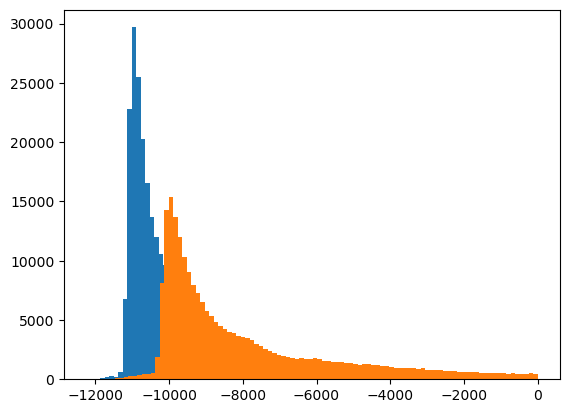

In [95]:
for h in [h1,h2]:
    hist(h[h>-12.5E3],100);

In [132]:
%%time

px1=[]
px2=[]

current_pixel=0
arr1=[]#np.zeros(512*512)
arr2=[]#np.zeros(512*512)

for ix,photon_event in enumerate(data_):


    if current_pixel==0:
        times1 = []
        times2 = []


    if photon_event['channel']==3:
        prev_event=None
        prev_step=1
        while not (prev_event):
            prev_ = data_[ix-prev_step]
            if (prev_['channel']==1013):
                prev_event=prev_    
                #px1.append((photon_event,prev_))   
                times1.append(prev_['time']- photon_event['time'])
            if (prev_['channel']==1014):        
                prev_event=prev_    
                #px2.append((photon_event,prev_))
                times2.append(prev_['time']- photon_event['time'])
            prev_step+=1

    if photon_event['channel']==2:
        current_pixel+=1
        if times1:
            arr1.append(times1)
        else:
            arr1.append([-12501])
        if times2:
            arr2.append(times2)
        else:
            arr2.append([-12501])
        times1 = []
        times2 = []

    if current_pixel==512*512*1:
        print(ix,f'{ix/len(data_):.2f}',photon_event, current_pixel)
        break


#

1658227 0.03 (0, 0, 2, 16880144238766161) 262144
CPU times: total: 5.38 s
Wall time: 5.54 s


In [133]:
len(arr1),len(arr2)

(262144, 262144)

In [105]:
len(arr1),len(arr2)

(123971, 109413)

In [109]:
for a in arr1:
    if len(a)>1:
        print(a,len(a))

[-10950, -1047183] 2
[-7666, -2212] 2
[-9906, -10420] 2
[-2903, -11104] 2
[-10413, -11138] 2
[-808, -10962] 2
[-9020, -10267, -9850] 3
[-11104, -8219] 2
[-8885, -9979] 2
[-10953, -7971] 2
[-10911, -10895, -10049, -4233] 4
[-11016, -10925, -4437, -10708, -10576] 5
[-9447, -11047] 2
[-9741, -6476] 2
[-10967, -11006, -11139] 3
[-7728, -9663] 2
[-8708, -11005, -10439] 3
[-1388, -10984] 2
[-10727, -4031, -11071] 3
[-11036, -10094] 2
[-5809, -10952, -9260, -11206] 4
[-10534, -10250, -6537, -4414] 4
[-10992, -9236] 2
[-11060, -9936] 2
[-7540, -8615] 2
[-9820, -9119, -10586] 3
[-10971, -11044] 2
[-5754, -6532] 2
[-10525, -9519] 2
[-8773, -10887, -9969, -5832] 4
[-8865, -3870] 2
[-10089, -10017] 2
[-10606, -11003] 2
[-11139, -11231] 2
[-10755, -10209] 2
[-6013, -682] 2
[-10512, -7908] 2
[-5320802, -10983, -9464] 3
[-10068, -10616] 2
[-10296, -11081, -6513] 3
[-10881, -10196] 2
[-6711, -10475] 2
[-9447, -6615] 2
[-2291324, -10645] 2
[-9203, -9098] 2
[-7749, -9092] 2
[-11025, -9810] 2
[-11148, -9

In [134]:
len(arr1)/(512*512)

1.0

In [155]:
%%time
sdt=np.zeros([512*512,256])

for a1x,a in enumerate(arr1):
    if a:
        tsx=[a1//50 for a1 in a if (a1//50)>-256]
        sdt[a1x,tsx]+=1

CPU times: total: 2.91 s
Wall time: 2.97 s


In [156]:
sdt1 = sdt.reshape([512,512,256])


In [144]:
#sdt1.sum((0,1))

In [154]:
#sdt1.sum(2)

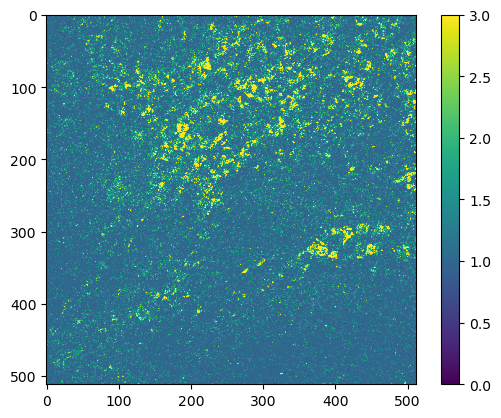

In [159]:
imshow(sdt1.sum(2),vmax=3)
colorbar()

In [164]:
#sdt1
#sdt1.sum((0,1))

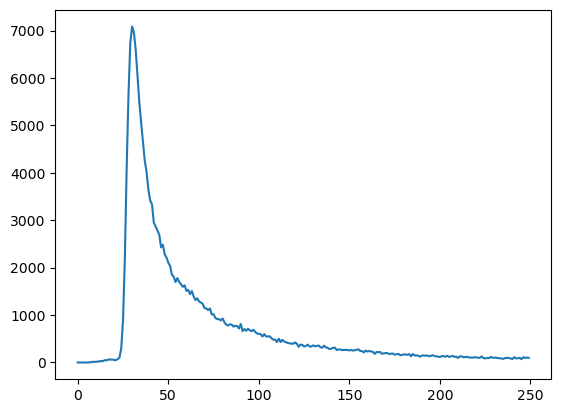

In [167]:
plot(sdt1[:,:,6:].sum((0,1)))

In [171]:
#from tqdm.notebook import tqdm
from fastprogress.fastprogress import progress_bar


0 0.00 (0, 0, -4, 16878414636870412) 0
1 0.00 (0, 0, 1013, 16878414636871139) 0
2 0.00 (0, 0, 4, 16878414636871865) 0
3 0.00 (0, 0, 3, 16878414636877266) 0
4 0.00 (0, 0, -5, 16878414893026820) 0
5 0.00 (0, 0, 3, 16878414893027600) 0
6 0.00 (0, 0, 1014, 16878414893027929) 0
7 0.00 (0, 0, 5, 16878414893029037) 0
8 0.00 (0, 0, -5, 16878415676566502) 0
9 0.00 (0, 0, 1014, 16878415676566885) 0
10 0.00 (0, 0, 5, 16878415676567268) 0
11 0.00 (0, 0, 3, 16878415676572776) 0
12 0.00 (0, 0, -4, 16878416156228741) 0
13 0.00 (0, 0, 1013, 16878416156229415) 0
14 0.00 (0, 0, 4, 16878416156230088) 0
15 0.00 (0, 0, 3, 16878416156238310) 0


KeyboardInterrupt: 

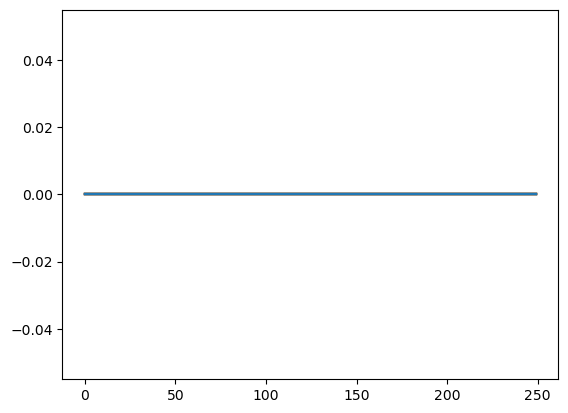

In [172]:
%%time

sdts=[]

current_pixel=0
arr1=[]#np.zeros(512*512)
arr2=[]#np.zeros(512*512)

for ix,photon_event in progress_bar(enumerate(data_),total=len(data_)):


    if current_pixel==0:
        times1 = []
        times2 = []


    if photon_event['channel']==3:
        prev_event=None
        prev_step=1
        while not (prev_event):
            prev_ = data_[ix-prev_step]
            if (prev_['channel']==1013):
                prev_event=prev_    
                #px1.append((photon_event,prev_))   
                times1.append(prev_['time']- photon_event['time'])
            if (prev_['channel']==1014):        
                prev_event=prev_    
                #px2.append((photon_event,prev_))
                times2.append(prev_['time']- photon_event['time'])
            prev_step+=1

    if photon_event['channel']==2:
        current_pixel+=1
        if times1:
            arr1.append(times1)
        else:
            arr1.append([-12501])
        if times2:
            arr2.append(times2)
        else:
            arr2.append([-12501])
        times1 = []
        times2 = []

    if (current_pixel%(512*512)==0)&(current_pixel>0):
        
        print(ix,f'{ix/len(data_):.2f}',photon_event, current_pixel)


        sdt1=np.zeros([512*512,256])
        sdt2=np.zeros([512*512,256])
        bin = int(12500/256)
        for a1x,a in enumerate(arr1):
            if a:
                tsx=[a1//bin for a1 in a if (a1//bin)>-256]
                sdt1[a1x,tsx]+=1
        for a1x,a in enumerate(arr2):
            if a:
                tsx=[a1//bin for a1 in a if (a1//bin)>-256]
                sdt2[a1x,tsx]+=1

        arr1=[]#np.zeros(512*512)
        arr2=[]#np.zeros(512*512)
        sdts.append((sdt1,sdt2))
        sdt1a = sdt1.reshape([512,512,256])
        plot(sdt1a[:,:,6:].sum((0,1)))
        sdt2a = sdt2.reshape([512,512,256])
        plot(sdt2a[:,:,6:].sum((0,1)))


48.828125

196458
151752
348171
CPU times: total: 250 ms
Wall time: 336 ms


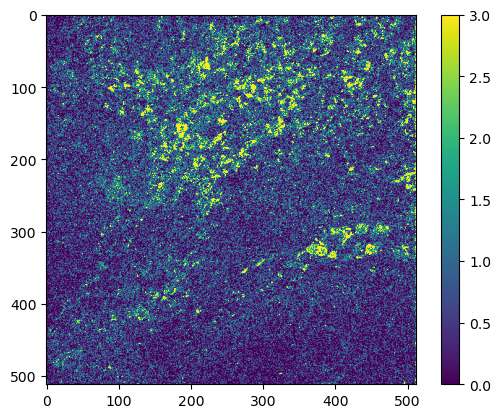

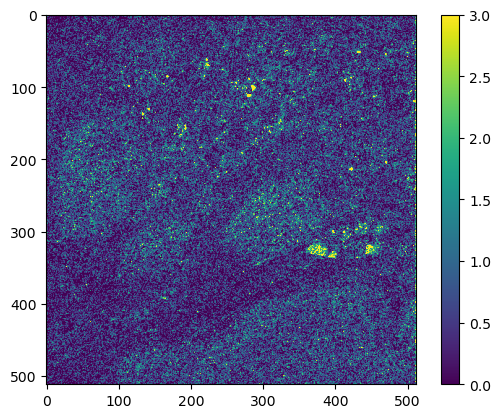

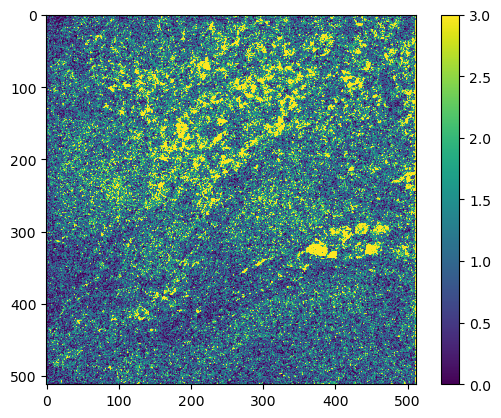

In [35]:
%%time
for channel_name in [ch1,ch2,sync]:
    img = [len(k) for k in channel_name]
    imgx = np.array(img)[:512*512].reshape([512,512])
    print(imgx.sum())
    figure()
    imshow(imgx,vmax=3)
    colorbar()

In [36]:
196458+ 151752 - 348171

39

In [37]:
n_pixels =  500
for k1,k2,k3 in zip(ch1[:n_pixels],ch2[:n_pixels],sync[:n_pixels]):    
    if len(k1)+len(k2) !=len(k3):
        print(k1,k2,k3)    

[416611221306] [] [416610582741, 416611231951]
[417322766388] [417323314619, 417323444142, 417324529637] [417322777342, 417322789836, 417323314206, 417323451527, 417324537701]
[] [417364004714] [417361929637, 417364014597]


In [38]:
%%time
imp=0
n_pixels=len(ch1)
for k1,k2,k3 in zip(ch1[:n_pixels],ch2[:n_pixels],sync[:n_pixels]):    
    if len(k1)+len(k2) !=len(k3):
        imp+=1
imp,n_pixels

CPU times: total: 125 ms
Wall time: 163 ms


(2910, 262145)

In [39]:
512*512

262144